# Module 4 Exercises - Data Visualization

### Exercise 1:

From the datasets folder, load the "dvddata.xlsx" file as a dataframe. Then rename the following columns (new column name is in parentheses):
- \# of Clients (Clients)
- Visits to each Client per Month (Visits)
- Calls to each Client per month (Calls)
- Emails to each Client per month (Emails)
- \# of businesses in district (Business)

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#these are different types of visualization databases that you can use to deal with your data. 

%matplotlib inline

In [29]:
location = "datasets/dvddata.xlsx"
df = pd.read_excel(location) #overwrites the info from the df variable in the examples above
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district
0,Addie Miller,52,A,393,16,2,4,30,500
1,Addie Miller,67,A,267,11,2,1,14,627
2,Addie Miller,104,A,148,4,1,1,17,778
3,Alexandra Jones,49,A,317,17,0,7,1,530
4,Alonzo Tennant,46,A,276,16,2,2,22,770


In [30]:
#rename the pound/hashtag(#) column so it doesn't cause further issues.
df.rename(columns={'# of Clients':'Clients'}, inplace =True)
df.rename(columns={'Calls to each Client per month':'Calls'}, inplace =True)
df.rename(columns={'Emails to each Client per month':'Emails'}, inplace =True)
df.rename(columns={'# of businesses in district':'Business'}, inplace =True)
df.head()

,Salesperson,District,Region,Sales,Clients,Visits to each Client per Month,Calls,Emails,Business
0,Addie Miller,52,A,393,16,2,4,30,500
1,Addie Miller,67,A,267,11,2,1,14,627
2,Addie Miller,104,A,148,4,1,1,17,778
3,Alexandra Jones,49,A,317,17,0,7,1,530
4,Alonzo Tennant,46,A,276,16,2,2,22,770


In [33]:
df.rename(columns={'Visits to each Client per Month':'Visits'}, inplace =True)
df.head()

,Salesperson,District,Region,Sales,Clients,Visits to each Client per Month,Calls,Emails,Business
0,Addie Miller,52,A,393,16,2,4,30,500
1,Addie Miller,67,A,267,11,2,1,14,627
2,Addie Miller,104,A,148,4,1,1,17,778
3,Alexandra Jones,49,A,317,17,0,7,1,530
4,Alonzo Tennant,46,A,276,16,2,2,22,770


In [35]:
df.columns

Index(['Salesperson', 'District', 'Region', 'Sales', 'Clients',
       ' Visits to each Client per Month', 'Calls', 'Emails', 'Business'],
      dtype='object')

In [36]:
df.rename(columns={' Visits to each Client per Month':'Visits'}, inplace =True)
df.head()

,Salesperson,District,Region,Sales,Clients,Visits,Calls,Emails,Business
0,Addie Miller,52,A,393,16,2,4,30,500
1,Addie Miller,67,A,267,11,2,1,14,627
2,Addie Miller,104,A,148,4,1,1,17,778
3,Alexandra Jones,49,A,317,17,0,7,1,530
4,Alonzo Tennant,46,A,276,16,2,2,22,770


### Exercise 2:

Using the dataframe from the previous exercise, use the Seaborn library to create a scatterplot of the number of clients compared to the sales.

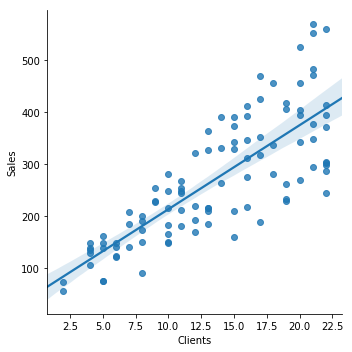

In [41]:
#make a scatterplot
sns.lmplot(x='Clients', y='Sales', data=df)

### Exercise 3:

Using the dataframe in the previous exercise, use the Seaborn library to make a boxplot of the Clients, Visits, Calls, and Emails columns. (**Hint**: Make a dataframe that only contains those columns)

In [42]:
stats_df = df.drop(['Sales', 'District', 'Region', 'Business'], axis=1)
stats_df.head()

,Salesperson,Clients,Visits,Calls,Emails
0,Addie Miller,16,2,4,30
1,Addie Miller,11,2,1,14
2,Addie Miller,4,1,1,17
3,Alexandra Jones,17,0,7,1
4,Alonzo Tennant,16,2,2,22


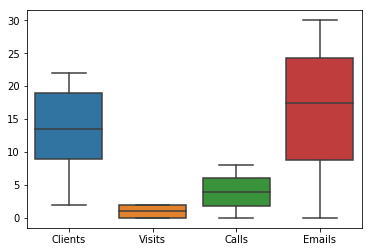

In [43]:
sns.boxplot(data=stats_df)

### Exercise 4:

Using the dataframe from Exercise 3, use the Seaborn library to make a violin plot of sales per region.

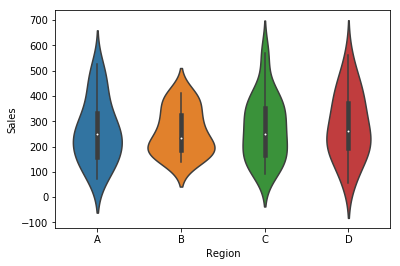

In [46]:
sns.violinplot(x='Region', y='Sales', data=df)

### Exercise 5:

Using the dataframe in the previous exercise, create a swarm plot of sales per region.

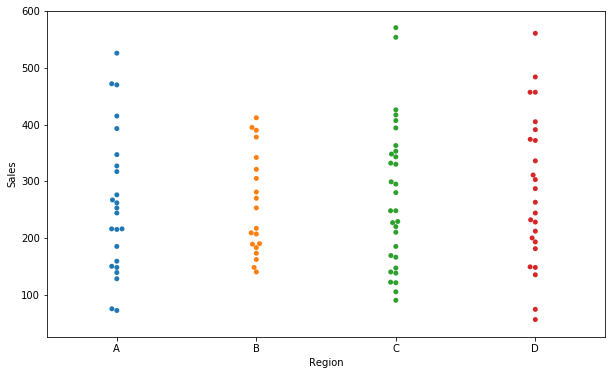

In [50]:
plt.subplots(figsize=(10,6))
sns.swarmplot(x='Region', y='Sales', data=df)

### Exercise 6:

Using the dataframe in the previous exercise, make a correlation heatmap.

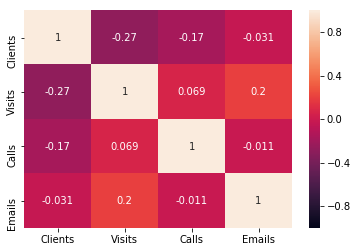

In [51]:
#show correlation of stats via heatmap
corr = stats_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [56]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(stats_df, 
                  id_vars=['Salesperson', 'Clients'], #column to keep not going into the melt.
                  var_name="Stat") #changed into category (one category) date apple banana--- date, fruits, sales #(compare with above)

melt_df.head()

,Salesperson,Clients,Stat,value
0,Addie Miller,16,Visits,2
1,Addie Miller,11,Visits,2
2,Addie Miller,4,Visits,1
3,Alexandra Jones,17,Visits,0
4,Alonzo Tennant,16,Visits,2


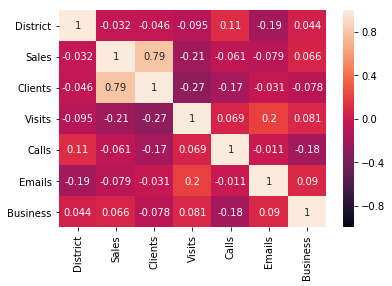

In [52]:
#show correlation of stats via heatmap
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

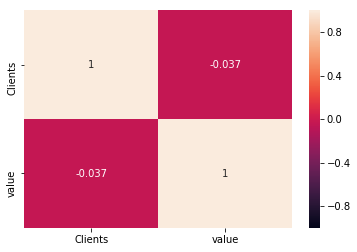

In [57]:
corr = melt_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

### Exercise 7:

Using the dataframe in the previous exercise, make a bar chart (count plot) of the regions.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

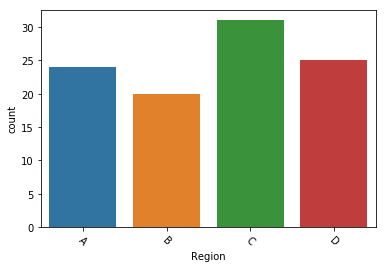

In [55]:
#create a bar plot of Type 1 frequency
sns.countplot(x='Region',
              data=df,)

plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

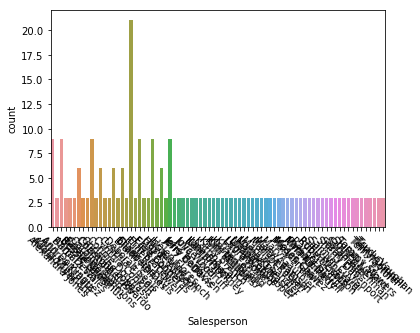

In [59]:
#create a bar plot of Type 1 frequency
sns.countplot(x='Salesperson',
              data=melt_df,)

plt.xticks(rotation=-45)

### Bonus  

Feel free to explore any other data visualizations using the Seaborn library.

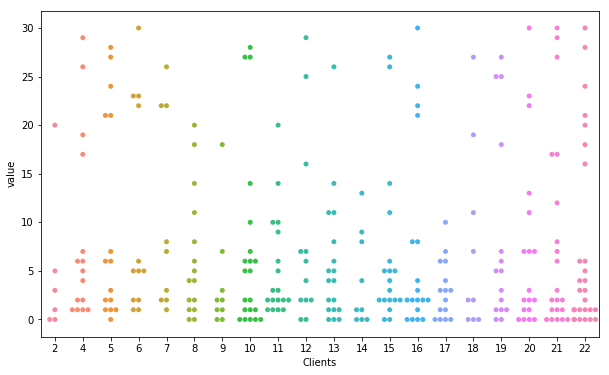

In [63]:
plt.figure(figsize=(10,6))

#swarm plot of Stats from melted dataframe
sns.swarmplot(x='Clients', y='value', 
              data=melt_df,)

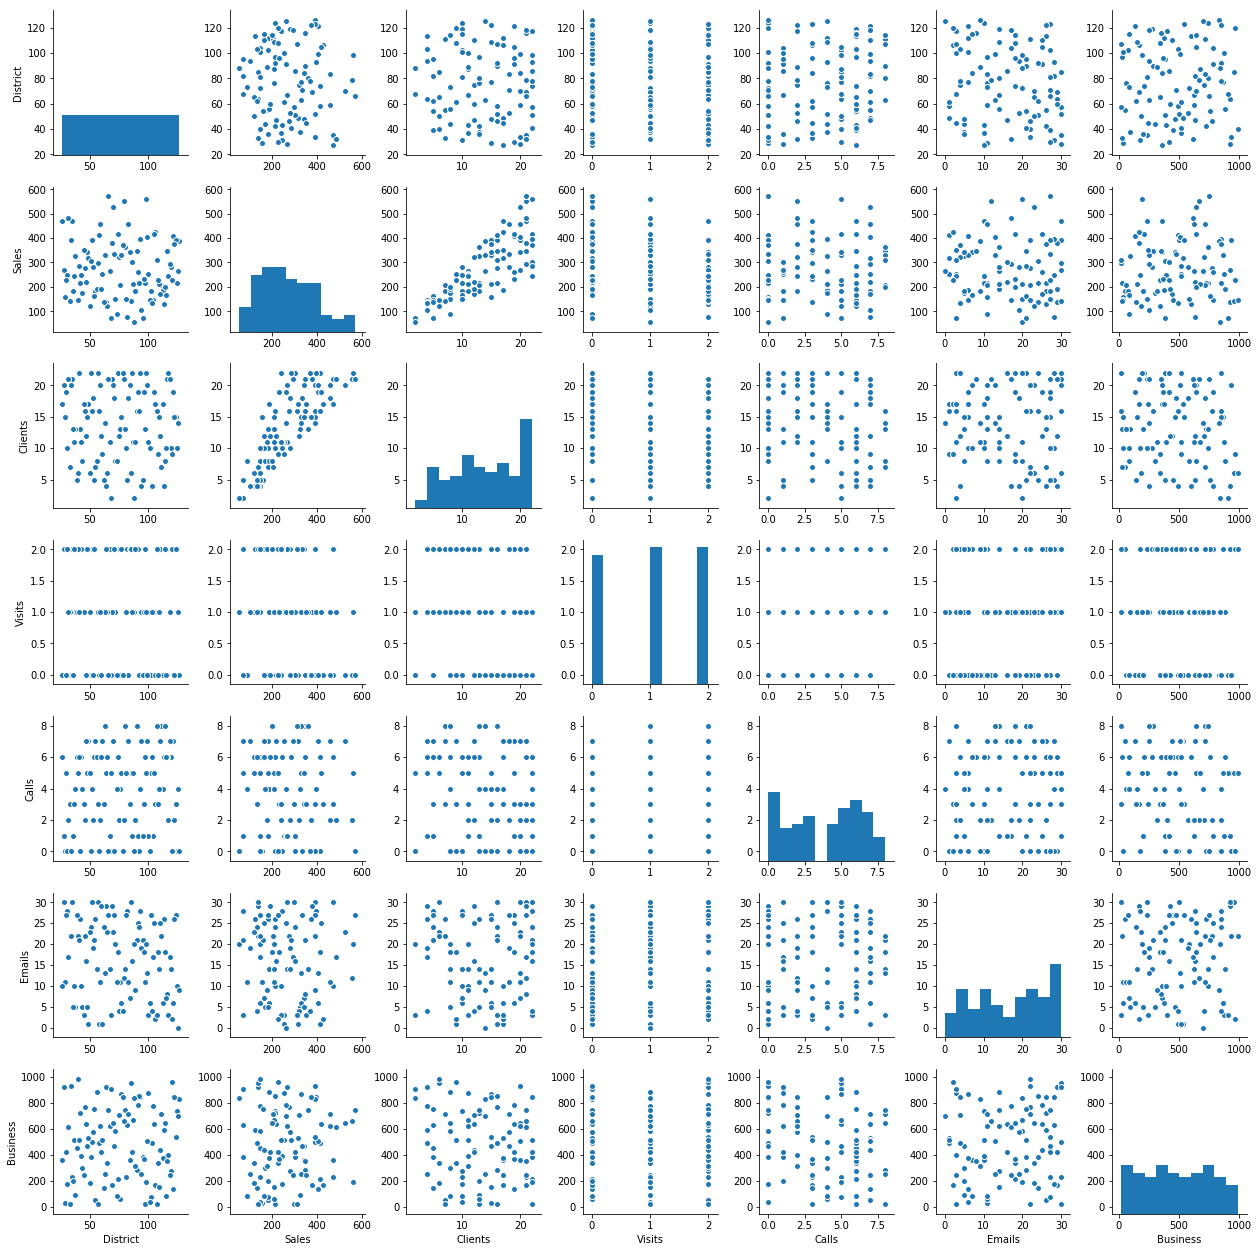

In [66]:
sns.pairplot(df)